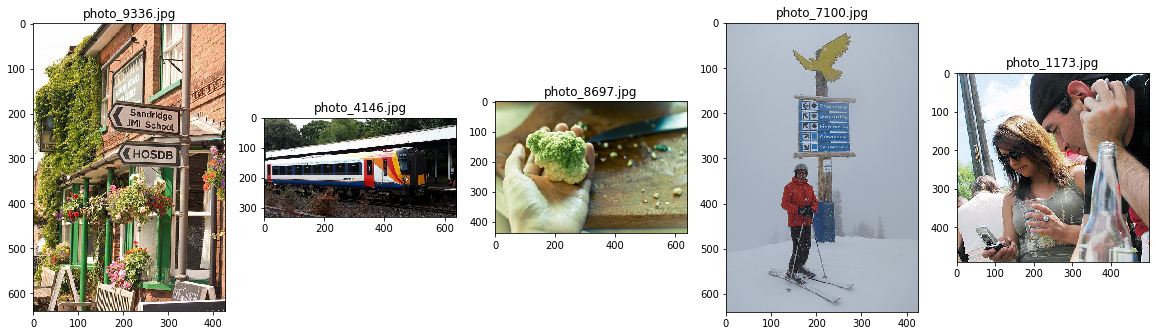

Found 41396 files belonging to 5 classes.
Using 8279 files for validation.
Found 41396 files belonging to 5 classes.
Using 33117 files for training.
['Painting', 'Photo', 'Schematics', 'Sketch', 'Text']


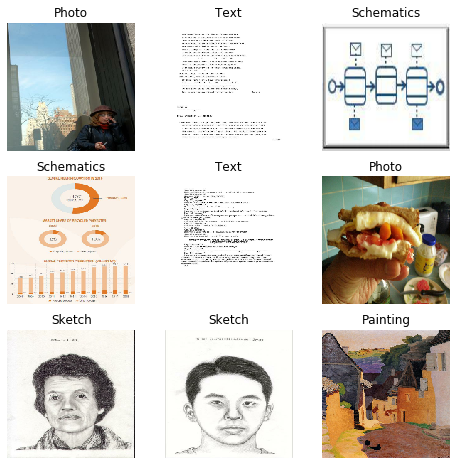

(32, 180, 180, 3)
(32,)


In [13]:
%run img_loading.ipynb

In [14]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

ds_train = ds_train.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
ds_test = ds_test.cache().prefetch(buffer_size=AUTOTUNE)

In [15]:
num_classes = 5 # Nombre de classes et donc aussi nombre de neurones dans la dernière couche
model = tf.keras.models.Sequential()

model = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255, offset=0),
  tf.keras.layers.Conv2D(32, [3,3], activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(16, [3,3], activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(8, [3,3], activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [16]:
model.add(layers.experimental.preprocessing.Rescaling(
    #A COMPLETER
    scale=1.0/255,
    offset=0,
    )
)

In [17]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs=10

history = model.fit(ds_train,
                    validation_data=ds_test,
                    epochs=epochs)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Epoch 1/10
1035/1035 [==============================] - 1986s 1s/step - loss: 0.7638 - accuracy: 0.6522 - val_loss: 0.5231 - val_accuracy: 0.7779
Epoch 2/10
 803/1035 [======================>.......] - ETA: 4:51 - loss: 0.5129 - accuracy: 0.7784